In [1]:
# Import the classical libraries required for plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

In [2]:
# Retrieve the data from the .csv file for analysis
df = pd.read_csv("Lifetime.csv")
cell_data = df["Mean lifetime"].to_numpy()

Text(0.5, 1.0, 'Lifetime of a GoL system')

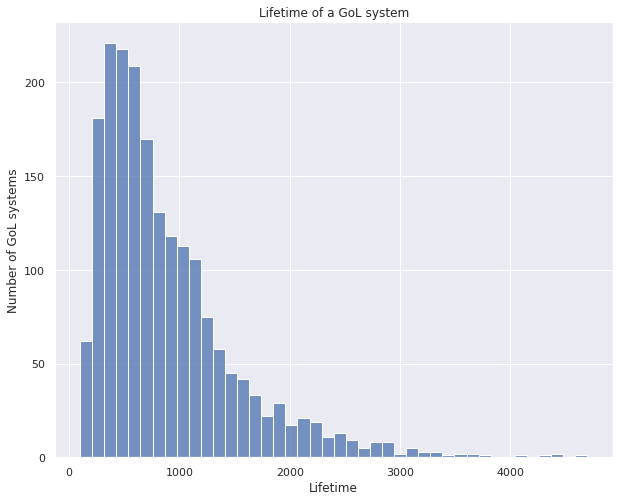

In [11]:
# Plot the histogram using the seaborn library. Set a nice theme
# and use the histplot method from seaborn library. Title for 
# histogram is set, as well as x and y labels
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme()
p = sns.histplot(data=cell_data)
p.set(xlabel="Lifetime", ylabel="Number of GoL systems")
p.set_title("Lifetime of a GoL system")

In [4]:
# Now retrieve the data for the last part in the Game of Life 
# checkpoint: the x and y coordinates of the Center of Mass
df1 = pd.read_csv("CM_coordinates.csv")
print(df1[1:50])

    Unnamed: 0  X_pos  Y_pos  T_time
1            1   22.8   23.2       1
2            2   23.2   23.4       2
3            3   23.2   23.8       3
4            4   23.4   24.2       4
5            5   23.8   24.2       5
6            6   24.2   24.4       6
7            7   24.2   24.8       7
8            8   24.4   25.2       8
9            9   24.8   25.2       9
10          10   25.2   25.4      10
11          11   25.2   25.8      11
12          12   25.4   26.2      12
13          13   25.8   26.2      13
14          14   26.2   26.4      14
15          15   26.2   26.8      15
16          16   26.4   27.2      16
17          17   26.8   27.2      17
18          18   27.2   27.4      18
19          19   27.2   27.8      19
20          20   27.4   28.2      20
21          21   27.8   28.2      21
22          22   28.2   28.4      22
23          23   28.2   28.8      23
24          24   28.4   29.2      24
25          25   28.8   29.2      25
26          26   29.2   29.4      26
2

In [5]:
# Declare the X, Y and T arrays representing the CoM coordinates on
# x and y 1D spaces as well as the time array. Convert them from pandas
# data frames to numpyarrays
xs = df1["X_pos"].to_numpy()
ys = df1["Y_pos"].to_numpy()
ts = df1["T_time"].to_numpy()

[Text(0.5, 0, 'Time T'), Text(0, 0.5, 'CoM x-coordinate')]

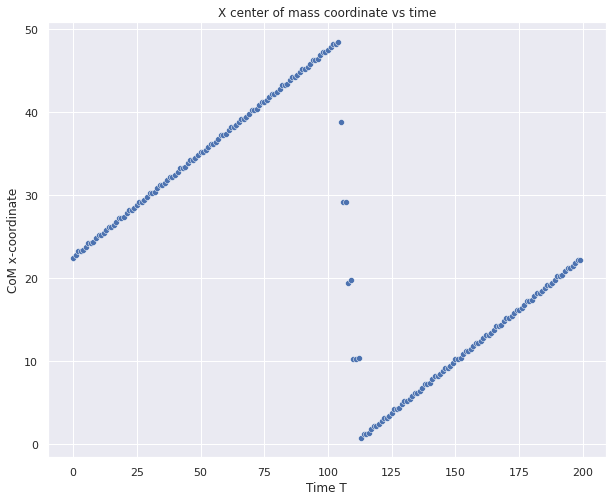

In [6]:
# Now plot again the data of xs vs ts representing the CoM coordinates.
# Use again seaborn for plotting. Title, x and y - labels have been set
# once again
fig, ax = plt.subplots(figsize=(10,8))
p = sns.scatterplot(x=ts, y=xs)
p.set_title("X center of mass coordinate vs time")
p.set(xlabel="Time T", ylabel="CoM x-coordinate")

In [7]:
# Analyze only the continuous part and work out the 
# speed of the glider. Use the parameter fitting function
# from the scipy library. Take only the first 50 samples 
# for further analysis
T = ts[:50]
X = xs[:50]
Y = ys[:50]

In [8]:
# Define the trial function for linear fitting. This is required
# for working out the speed on x-axis
def myFit(x, a, b):
    return a*x + b

In [9]:
# Now use the trial fitting function to work out the slope of the
# line as well as the errors in estimation of the slope
popt_x, pcov_x = scipy.optimize.curve_fit(myFit, T, X, p0=np.array([0.2, 20]))
popt_y, pcov_y = scipy.optimize.curve_fit(myFit, T, Y, p0=np.array([0.2, 20]))

print("Speed of the particle on x-axis is: " + str(popt_x[0]))
print("Speed of the particle on y-axis is: " + str(popt_y[0]))

Speed of the particle on x-axis is: 0.24994958010350798
Speed of the particle on y-axis is: 0.24993037210738808


[Text(0.5, 0, 'Time T'), Text(0, 0.5, 'CoM x-coordinate')]

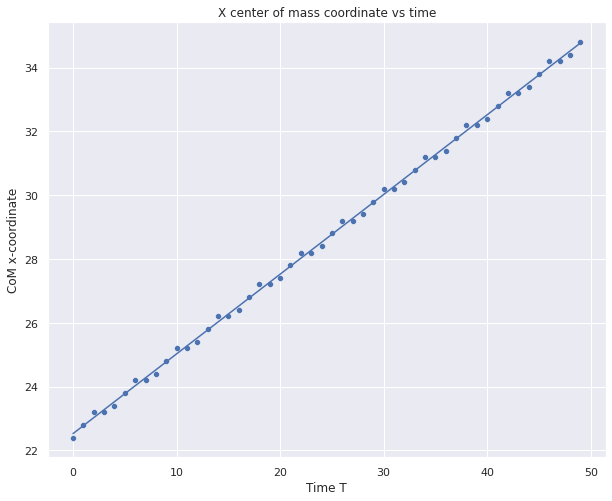

In [10]:
# Now make a final scatter plot of the final results and witness the
# results. Use again seaborn for this. Choose at free will between
# x and y axis
fig, ax = plt.subplots(figsize=(10,8))
p = sns.scatterplot(x=T, y=X)
sns.lineplot(x=T, y=(popt_x[0] * T + popt_x[1]))
p.set_title("X center of mass coordinate vs time")
p.set(xlabel="Time T", ylabel="CoM x-coordinate")